#### KBinsDiscretizer help to build k no of cat

In [6]:
# sixth notebook

import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt


# outlier can be special cases where students studies longer and get lower score
# or student doesn't study n get higher scores
student_marks = pd.read_csv("./Datasets/student_performance.csv")
student_marks.sample(10)

,Hours Studied,Score Obtained,Outliers
110,932,99.794208,False
17,132,3.179915,False
24,172,5.040238,False
81,767,98.528408,False
114,951,99.836095,False
57,465,64.106741,False
60,524,78.380848,False
72,647,94.069916,False
18,143,3.612418,False
41,304,20.554359,False


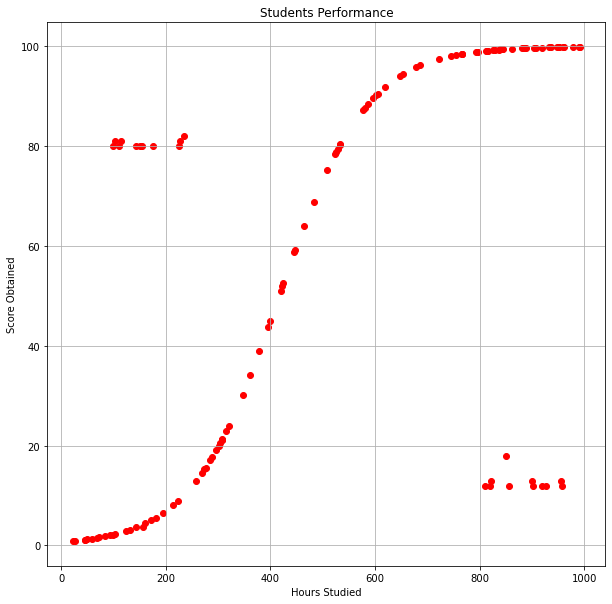

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))

plt.scatter(student_marks["Hours Studied"], student_marks["Score Obtained"], color ="red")

ax.set(xlabel= "Hours Studied", ylabel= "Score Obtained", title = "Students Performance")
ax.grid()

plt.show()

In [8]:
# kbin discretizer, unioform startegy means all bins have equal widths
k_bins = KBinsDiscretizer(n_bins = 3, encode = "ordinal", strategy="uniform")

In [9]:
k_bins_array = k_bins.fit_transform(student_marks[["Score Obtained", "Hours Studied"]])
k_bins_array.shape   # values in the 2 cols are bins to which each record in feature belong

(122, 2)

In [11]:
kbins_df = pd.DataFrame(data= k_bins_array, columns = ["Binned_Score", "Binned_Hours"])

kbins_df.sample(10)

,Binned_Score,Binned_Hours
64,2.0,1.0
94,2.0,2.0
54,1.0,1.0
97,0.0,2.0
70,2.0,1.0
106,2.0,2.0
12,2.0,0.0
88,0.0,2.0
89,0.0,2.0
82,2.0,2.0


In [12]:
# concat bin df and original df
students_kbins = pd.concat([student_marks, kbins_df], axis = 1)
students_kbins.sample(10)

,Hours Studied,Score Obtained,Outliers,Binned_Score,Binned_Hours
95,845,99.417642,False,2.0,2.0
7,73,1.592205,False,0.0,0.0
120,991,99.898515,False,2.0,2.0
66,580,87.653295,False,2.0,1.0
82,794,98.931318,False,2.0,2.0
100,885,99.638845,False,2.0,2.0
35,274,15.290449,False,0.0,0.0
8,83,1.791570,False,0.0,0.0
68,597,89.696980,False,2.0,1.0
118,961,99.854603,False,2.0,2.0


In [14]:
# gets unique val for binned scores
students_kbins["Binned_Score"].unique()

array([0., 2., 1.])

In [17]:
# gets the bin edges(edges that make up the bin)
marks_edges = k_bins.bin_edges_[0]
hours_edges = k_bins.bin_edges_[1]

marks_edges, hours_edges

(array([ 0.8697363 , 33.87973234, 66.88972838, 99.89972442]),
 array([ 22.        , 345.33333333, 668.66666667, 992.        ]))

In [18]:
# in data, student where Bin score != Bin hours are outliers
# op gets them to see
students_kbins[(students_kbins["Binned_Score"] != students_kbins["Binned_Hours"])].sample(10)

,Hours Studied,Score Obtained,Outliers,Binned_Score,Binned_Hours
89,822,13.000000,True,0.0,2.0
59,509,75.175606,False,2.0,1.0
60,524,78.380848,False,2.0,1.0
20,150,80.000000,True,2.0,0.0
15,115,81.000000,True,2.0,0.0
109,928,12.000000,True,0.0,2.0
96,850,18.000000,True,0.0,2.0
47,347,30.237790,False,0.0,1.0
97,857,12.000000,True,0.0,2.0
116,958,12.000000,True,0.0,2.0


In [19]:
# creates a comment col that will be later used to tag outlier students
students_kbins["Comment"] = ' '
students_kbins.head()

,Hours Studied,Score Obtained,Outliers,Binned_Score,Binned_Hours,Comment
0,22,0.869736,False,0.0,0.0,
1,26,0.912112,False,0.0,0.0,
2,45,1.143020,False,0.0,0.0,
3,46,1.156660,False,0.0,0.0,
4,50,1.212843,False,0.0,0.0,


In [22]:
# finds rows where binn score- bin hours == 2 and insert 'suspicious' in comment col
students_kbins.loc[students_kbins["Binned_Score"] - students_kbins["Binned_Hours"] == 2, "Comment"] = "Suspicious"

students_kbins.sample(10)

,Hours Studied,Score Obtained,Outliers,Binned_Score,Binned_Hours,Comment
30,225,80.000000,True,2.0,0.0,Suspicious
71,619,91.893768,False,2.0,1.0,
85,813,99.147339,False,2.0,2.0,
109,928,12.000000,True,0.0,2.0,
110,932,99.794208,False,2.0,2.0,
47,347,30.237790,False,0.0,1.0,
101,885,99.638845,False,2.0,2.0,
2,45,1.143020,False,0.0,0.0,
65,577,87.258382,False,2.0,1.0,
38,289,17.770125,False,0.0,0.0,


In [25]:
students_kbins.loc[students_kbins["Binned_Hours"] - students_kbins["Binned_Score"] == 2, "Comment"] = "Needs_help"

students_kbins.sample(10)

,Hours Studied,Score Obtained,Outliers,Binned_Score,Binned_Hours,Comment
82,794,98.931318,False,2.0,2.0,
96,850,18.000000,True,0.0,2.0,Needs_help
50,396,43.831583,False,1.0,1.0,
65,577,87.258382,False,2.0,1.0,
34,269,14.529379,False,0.0,0.0,
98,862,99.524598,False,2.0,2.0,
103,900,13.000000,True,0.0,2.0,Needs_help
13,103,2.266517,False,0.0,0.0,
79,766,98.510907,False,2.0,2.0,
36,276,15.603904,False,0.0,0.0,


In [27]:
# gets unique val from comment col
categories = students_kbins["Comment"].unique()

categories

array([' ', 'Suspicious', 'Needs_help'], dtype=object)

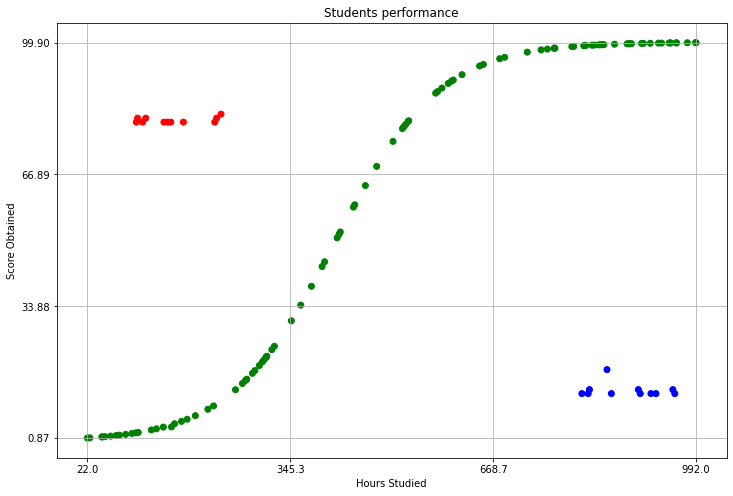

In [29]:
fig, ax = plt.subplots(figsize = (12, 8))

colors = {categories[0]: "green", categories[1]: "red", categories[2]: "blue"}

ax.scatter(students_kbins["Hours Studied"], students_kbins["Score Obtained"],
           c = students_kbins["Comment"].apply(lambda x: colors[x]))

ax.set(xlabel = "Hours Studied", ylabel = "Score Obtained", title = "Students performance")

ax.grid()
ax.set_xticks(hours_edges)
ax.set_yticks(marks_edges)

plt.show()